<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/21%20Time%20Series%20Analysis%20in%20Python/Financial_DS_Webinar_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Data Science Webinar

There are numerous different data science tools that we can apply in finance. In this webinar, we will go through the following applications:
    
    * Linear regression for asset pricing
    * Neural Network/Deep Learning for credit risk estimation
    * Elliptic Envelope for stock price crash
    * Time Series Analysis
    * Volatility prediction
    * Principal Component Analysis (PCA) for liquidity proxy

## Asset Pricing Model

Financial investment decision is a function of risk and return, which are positively related to each other. Investor tries to obtain highest possible return while mitigating the risk as much as possible. So, in a nutshell, investor tend to invest in an asset with best risk-return combination. But the question is how can we estimate the best risk-return combination?

This lesson tries to tackle this question using two celebrated models. In this part of the lesson, we will discuss the two prominent models about asset valuation: 
* Capital Asset Pricing Model
* Arbitrage Pricing Theorem

##  Capital Asset Pricing Model (CAPM) 

It is an easy task to measure return of an asset, which is nothing but a change in an asset's value based on previous period. How about risk? It is exactly where `Markowitz's Portfolio Theory`comes into the picture. Markowitz's article titled ["Portfolio Selection"](https://www.math.ust.hk/~maykwok/courses/ma362/07F/markowitz_JF.pdf) provides a clear definition of what had hitherto been unambiguous. 

This trade-off is defined as the selection problem of the portfolio mean and variance of the assets, and given the risk level the theory has suggested that high expected return should be selected. Expected return and risk are given as follows:

$$ \text{Expected Return}=\mathbb{E}(R_i)$$
$$\text{Risk}=\sigma (R_i)$$

where $R_i$ is the return of ith asset and $\mathbb{E}$ denotes expectation operator, and $\sigma$ represents the standard deviation of return. Thus, standard deviation is assumed to be a risk of an asset and this approach paves the way for further analysis.

In order to better understand and handle the risk in finance, we need to differentiate it:
* Systematic Risk: It is the that cannot be disappeared by diversification. Therefore it is also referred to as `non-diversifiable risk`.  More specifically, random fluctuations in the value of an asset can be balanced out by holding diverse assets. Some systematic risks are:
    * Interest rate risk
    * Inflation risk
    * Market risk

* Unsystematic Risk: It is the risk that can be mitigated through diversification. That is random fluctuations in the value of the asset can be balanced out by holding many different assets. Unsystematic risk arises from Stock-specific issues. Some unsystematic risks can be listed as:
    * Business risk: Any Internal weakness of a company can jeopardize its profitability
    * Financial risk: Change in capital structure allocation of a company
    * Entrance of a new competitor

CAPM examines the systematic risk ($\beta$) and expected return in a competitive market. It is a parametric and univariate approach. The ultimate aim of this method is to price an individual security or a portfolio. Let's now talk about the components and the formula of CAPM:

$$\mathbb{E}(R_i)=\alpha_i+\beta_i\mathbb{E}(R_m)$$

where
 * $R_i$: Expected excess return of the $i^{th}$ stock
 * $\alpha_i$: asset’s return\loss coming from technical analysis
 * $R_m$: Expected excess market return
 * $\beta_{i}$: Slope coefficient
 

Here, excess return represents the portion of an individual stock or market return above the `risk free rate`. Or it can be formulated as:

$$\mathbb{E}(R_i)=\mathbb{E}(r_i)-r_f$$

where $r_f$ is risk free rate and $r_i$ is the individual stock return. So, excess return checks if an asset yields  larger return than a safe asset. If so, it is a motivation to invest, otherwise, investor prefer to invest in a safe asset whose return is low but guaranteed.

The result, denoted as $\mathbb{E}(R_i)$, is also the required return or discount rate used in valuing an asset or a project that we discuss in NPV lesson:

Required Rate of Return = Risk Free Rate of Return + Beta*(Market Return – Risk Free Rate of Return)

Thus, CAPM can be defined as:

$$
r_i-r_f= \alpha_i + \beta_{i}(\mathbb{E}(r_m)-r_f) + \epsilon_i
$$

where
 * $\epsilon_i$: Error term

We need to put special emphasize on $\beta$, which shows the extent to which an investment adds risk to a portfolio. Put differently, it is a measure of systematic risk of a stock in comparison to the market. It is also indicates the correlation between individual stock and market: 



* If the $\beta$>1, stock is riskier than the benchmark market
* If the $\beta$=1, stock is as riskier as the benchmark market
* If the $\beta$<1, stock is as less riskier as than the benchmark market

Enough theory, let's begin the empirical part. First step, as always, is to import the necessary Python libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

 In this part, instead of visiting a website and downloading the data to our local computer, we directly access to `yahoo finance` and retrieve the data as  we have learned in the previous lesson. To compare the performance of the companies, we will run CAPM analyses with three difference companies operating in telecomunication sector. These companies are `Comcast`, `AT&T`,`Verizon` and the market these stocks are listed is S&P-500. We use tickers to retreive data from yahoo finance:
 * CMCSA: Comcast
 * T: AT&T
 * VZ: Verizon
 * ^GSPC: S&P-500

The analysis covers the business day for the period of 01-01-2016 and 01-01-2020 with monthly stock price data.

In [ ]:
stocks = ['CMCSA','^GSPC']
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2020,1,1)
stock_prices = yf.download(stocks,start=start,end = end, interval='1mo')

[*********************100%***********************]  2 of 2 downloaded


In [ ]:
stock_prices.head()

Adj Close           Close            High             Low           \
               CMCSA    ^GSPC  CMCSA    ^GSPC  CMCSA    ^GSPC  CMCSA    ^GSPC   
Date                                                                            
2016-01-01     25.16  1940.24  27.85  1940.24  28.02  2038.20  26.17  1812.29   
2016-01-04       NaN      NaN    NaN      NaN    NaN      NaN    NaN      NaN   
2016-02-01     26.19  1932.23  28.86  1932.23  29.85  1962.96  27.19  1810.10   
2016-03-01     27.71  2059.74  30.54  2059.74  30.68  2072.21  29.02  1937.09   
2016-04-01     27.57  2065.30  30.38  2065.30  31.45  2111.05  30.01  2033.80   

             Open                Volume                
            CMCSA    ^GSPC        CMCSA         ^GSPC  
Date                                                   
2016-01-01  27.58  2038.20  532587400.0  9.240977e+10  
2016-01-04    NaN      NaN          NaN           NaN  
2016-02-01  27.53  1936.94  608842000.0  9.304956e+10  
2016-03-01  29.11  1937.09  400644600.0  9.263942e+10  
2016-04-01  30.30  2056.62  425409600.0  8.112499e+10

In [ ]:
stock_prices=stock_prices['Close']
stock_prices.dropna(inplace=True)

As CAPM requires stock returns, there are various ways to calculate return in Python but `.pct_change()` is one of the most easyto-apply function. Once we calculate the return first row becomes `nan` as return for the first entry cannot be computed.

In [ ]:
returns=stock_prices.pct_change()
returns.dropna(inplace=True)
returns.head()

,CMCSA,GSPC
Date,,
2016-02-01,0.036266,-0.004128
2016-03-01,0.058212,0.065991
2016-04-01,-0.005239,0.002699
2016-05-01,0.041804,0.015325
2016-06-01,0.030016,0.000911


Now, after having the return for three stock and one market index, extracting risk free rate allows us to compute excess return. To access the risk free rate data, we use `Fred API` as we have learned previosly. Please note that there is no single risk free rate, different researchers apply different risk free rate but the common property of these rates is that they are issued by a government, which makes them safe heaven to invest. Here, we select `3-Month Treasury Constant Maturity Rate`, which is short-term T-Bill with relatively low and safe return.

In [ ]:
from fredapi import Fred
fred = Fred(api_key='my API key')

In [ ]:
risk_free=fred.get_series('DGS3MO')
risk_free=risk_free['2016-01-01':'2019-12-31']
rf=risk_free/3

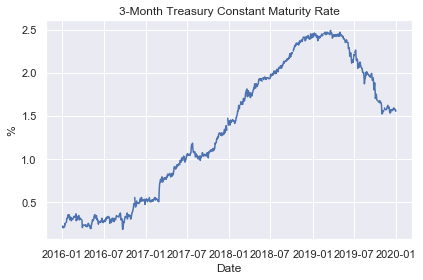

In [ ]:
plt.plot(risk_free)
plt.xlabel('Date')
plt.ylabel('%')
plt.title('3-Month Treasury Constant Maturity Rate')
plt.tight_layout()
plt.show()

To calculate the excess return, we need to subtract risk free rate from the stock returns. We calculate and stor all excess return in data frame named `returns`.

In [ ]:
stocks=["CMCSA","GSPC"]
for i in stocks:
    returns["excess_return_"+str(i)]=returns[i]-rf
returns.head()

,CMCSA,GSPC,excess_return_CMCSA,excess_return_GSPC
Date,,,,
2016-02-01,0.036266,-0.004128,-0.080401,-0.120795
2016-03-01,0.058212,0.065991,-0.051788,-0.044009
2016-04-01,-0.005239,0.002699,-0.081906,-0.073967
2016-05-01,0.041804,0.015325,NaN,NaN
2016-06-01,0.030016,0.000911,-0.069984,-0.099089


We are ready to run the CAPM analysis after all these preparation process. First, we run the CAPM analysis for Comcast and it turns out that Comcast is less volatile than the S&P-500 as we have a beta coefficient of 0.8944. This estimated beta coefficient is statistically significant at 1% level since we have a t-value of 15.164 (or p-value of 0.0000). However, the intercept term is not statistically significant. Therefore, interpretation of the intercept term, which indicates the performance of the technical analysis, does not make sense.

In [ ]:
import statsmodels.api as sm

In [ ]:
returns.dropna(inplace=True)
y_cmsa=returns['excess_return_CMCSA']
X=returns['excess_return_GSPC']
X= sm.add_constant(X, prepend=False)
CAPM_CMSA= sm.OLS(y_cmsa, X)
CAPM_results_CMSA = CAPM_CMSA.fit()

In [ ]:
CAPM_results_CMSA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     excess_return_CMCSA   R-squared:                       0.968
Model:                             OLS   Adj. R-squared:                  0.967
Method:                  Least Squares   F-statistic:                     908.2
Date:                 Sun, 28 Mar 2021   Prob (F-statistic):           5.48e-24
Time:                         10:07:39   Log-Likelihood:                 51.751
No. Observations:                   32   AIC:                            -99.50
Df Residuals:                       30   BIC:                            -96.57
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     0.9684      0.032     30.136      0.000       0.903       1.034
const                 -0.0083      0.016     -0.515      0.611      -0.041       0.025
==============================================================================
Omnibus:                        2.411   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                1.235
Skew:                           0.199   Prob(JB):                        0.539
Kurtosis:                       3.876   Cond. No.                         4.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Neural Network for credit risk estimation

The primary role of financial institutions is to create a channel by which funds move from entities with surplus into ones with deficit. Thereby financial institutions ensure the capital allocation in the financial system as well as gain profit in exchange for this transaction.

However, there is an important risk for financial institutions to handle, which is credit risk. This is such a big risk that without it capital allocation might be less costly and more efficient. Credit risk is known as the risk arising when borrower is not able to honor her debt. 

**A question: Why we emphasize the applicability of neural network?**

In my recent application, here is the summary of the results:

In [ ]:
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
param_NN = {"hidden_layer_sizes": [(10,),(100,)],
             "solver": ["lbfgs", "sgd", "adam"], 
             "learning_rate_init": [0.001,0.05]}

In [ ]:
MLP = MLPClassifier(random_state=42)

In [ ]:
param_halve_NN=HalvingRandomSearchCV(MLP, param_NN,scoring = 'roc_auc')
param_halve_NN.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in NN {} with {}'.
      format(param_halve_NN.best_score_,param_halve_NN.best_params_))

Best hyperparameters for first cluster in NN 0.9280292554023204 with {'solver': 'adam', 'learning_rate_init': 0.05, 'hidden_layer_sizes': (100,)}


In [ ]:
y_pred_NN1=param_halve_NN.predict(X_test1)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1,y_pred_NN1)))

The ROC AUC score of NN for first cluster is 0.5633


## Deep Learning Network for credit risk estimation

In [ ]:
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

In [ ]:
def DL_risk(dropout_rate,verbose=0):
    model = keras.Sequential()
    model.add(Dense(128,kernel_initializer='normal', 
        activation = 'relu', input_dim=4))
    model.add(Dense(64, kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dense(8,kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop')
    return model

In [ ]:
parameters = {'batch_size':  [10, 50, 100],
          'epochs':  [50, 100, 150],
             'dropout_rate':[0.2,0.4]}
model = KerasClassifier(build_fn = DL_risk)
grid_search = GridSearchCV(estimator = model,
                       param_grid = parameters,
                          scoring = 'roc_auc')

In [ ]:
grid_search.fit(X_train1, y_train1,verbose=0)
print('Best hyperparameters for first cluster in DL is {} with {}'.
      format(grid_search.best_score_,grid_search.best_params_))

Best hyperparameters for first cluster in DL is nan with {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 50}


In [ ]:
model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate= grid_search.best_params_['dropout_rate'],# <6>
                        verbose = 0,
                        batch_size = grid_search.best_params_['batch_size'],# <7>
                        epochs = grid_search.best_params_['epochs'])# <8>
model.fit(X_train1, y_train1)
DL_predict1 = model.predict(X_test1)
DL_ROC_AUC = roc_auc_score(y_test1, pd.DataFrame(DL_predict1.flatten()))# <9>
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))

DL_ROC_AUC is 0.5591


## Elliptic Envelope for stock price crash

In particular, after the 2008 global financial crisis the determinants of negative stock price movements and bad news effect have been at the core of discussion. Most of the studies suggest that stocks are more prone to downward movements than upward movements, indicating that stock market returns are asymmetrically distributed in the sense that negative news will cause a larger decline in stock returns than an equal magnitude of good news. This asymmetry causes negatively skewed stock returns.

The most well-known methods for identifying stock price crash are:

* Negative Skewness (NSKEW)
* Down and Up Volatility (DUVOL)

![image](stock_price_formula.png)

In [ ]:
from sklearn.covariance import EllipticEnvelope
envelope =  EllipticEnvelope(contamination = 0.0027) 
yhat_year=[]
for i in weekly_ret3.TICKER.unique():
    weekly_stock = df.loc[df['TICKER'] == i]['RET']
    envelope.fit(np.array(weekly_stock).reshape(-1,1))
    yhat_year.append(envelope.predict(np.array(weekly_stock[-weeks:]).reshape(-1,1)))

In [ ]:
plt.figure(figsize=(20,10))
X_test_df_year.loc[:,'BI'].hist(color='blue', label='normal')
neg_outliers[neg_outliers<0].loc[:,'BI'].dropna().hist(color='red', label='anomaly')
plt.legend()

![](anomaly_1.png)

# Time Series Analysis

Techniques that we apply varies depending on the dataset at our disposal. The analysis of data with different time points leads to unique treatment in statistical modeling. In finance, having time dimension in the data is not a rare rather very common issues and these type of data should be treated with cautious.

The statistical modeling approach by which we try to address the statistical issues considering the time dimension is referred to as `time series analysis`. For instance, stock prices, inflation, economic growth, dividend payment, interest rates, weather data are just a few cases in which data has time dimension.

The primary motivation in time series analysis lies in the correlation in time. More specifically, as the current value is to some degree dependent on its past values. So, the correlation between successive time points can unveil the dependence structure of this time-based relationship.

 We are about the discuss in-depth time series analysis. Get ready and take a deep breath because if you are a financial modeling enthusiast, I bet this will be your reference course.

Suppose that we have random variables denoted as $x_t$, $x_{t-1}$, $x_{t-2}$ where $x_t$ denotes realization of z at time t. If current value of x ($x_t$) depends on the lag values ($x_{t-1}$, $x_{t-2}$ and so on), we are talking about time series modeling.

There is an important concept about time series modeling: **Stationary**

### Stationary

The basic assumption in modeling is that $X_i$ should be independent from other realizations. If independence assumption does not hold, the result of the model cannot be reliable any more. Stationary is a way to model the dependent structure that we have in time-dependent data. For instance, current stock price is somewhat related to the previous prices of the stock.

In time series, it is common to have non-stationary data and taking difference is a way to make non-stationary data a stationary one. Taking first difference is nothing but taking difference of two successive values. 

$$\Delta x=x_t-x_{t-1}$$

To show how it take the first difference in Python, I use the Apple stock price gathered from yahoo-finance. By doing that, we are able to observe the changes between stationary and non-stationary data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stock = 'BLK'
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,4,9)
blk_close = yf.download(stock,start=start,end = end, interval='1d')['Close']

[*********************100%***********************]  1 of 1 downloaded


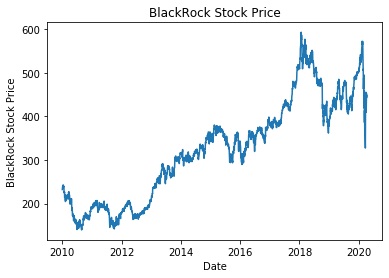

In [ ]:
plt.plot(blk_close)
plt.title('BlackRock Stock Price')
plt.ylabel('BlackRock Stock Price')
plt.xlabel('Date')
plt.show()

As we can observe, there is a real trend in Apple's stock price. Specifically, in 2010, it has a value under $\$50$ and, towards the beginning of 2020, it hit $250. Thus, it is not stationary.

Another way of detecting the non-stationarity is to apply `Autocorrelation Function`. Autocorrelation implies serial dependence. Precisely, it occurs when a time series is highly correlated with its lagged version. It is shown by acf plot. The more height of the bar in the acf plot, the more dependence a series has.

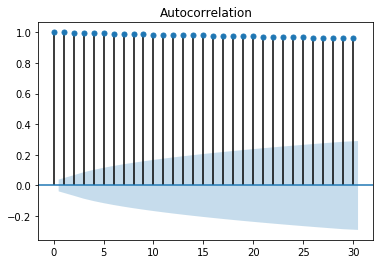

In [ ]:
sm.graphics.tsa.plot_acf(blk_close,lags=30)
plt.show()

The `acf` plot indicates that acf is slowly decaying, which is an indicator of non-stationarity. 

Let's see what happens when the first difference of the stock price is taken. `.diff()` function takes the first difference in Python.

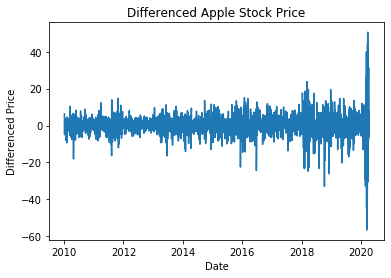

In [ ]:
plt.plot(blk_close.diff())
plt.title('Differenced Apple Stock Price')
plt.ylabel('Differenced Price')
plt.xlabel('Date')
plt.show()

After taking the first difference, it is quite obvious that the series fluctuates around its mean and it is referred to as weakly stationary.

### Time Series Models

After briefly visiting the theory of time series, it is time to discuss the main time series models, which are:

    * Moving Average
    * Autoregressive Model
    * Autoregressive Integrated Moving Average

### Moving Average Model

`Moving average`model tries to capture the time series dynamics simply by error terms. Let $e_t$ is a normally distributed term, meaning that it is identically and independently distributed (iid). So, unlike AR, MA is alway stationary.

MA(1) can be take the following form:

$$ X_{t} = \alpha + \beta \epsilon_{t-1} + \epsilon_{t} $$



Similarly, the $q_{th}$ order moving average model can be shown as:

$$ X_{t} = \alpha + \beta_1 \epsilon_{t-1} +\cdots+\beta_q \epsilon_{t-q} +\epsilon_{t} $$

Modeling a time series with MA in Python is not very different from modeling AR. The only difference is the location of the order (lag) parameter. The first parameter of order represent the number of lag values of AR whereas the second input of order in ARMA defines the number of lag values in modeling MA. A quick note: As the MA works with the windows, less order number might result in bad prediction.

Let's decide the best-fitting MA model. But before moving forward, I need to calculate the first difference and drop the missing values to not to get `exog contains inf or nans` error.

In [ ]:
diff_blk_close=blk_close.diff().dropna()

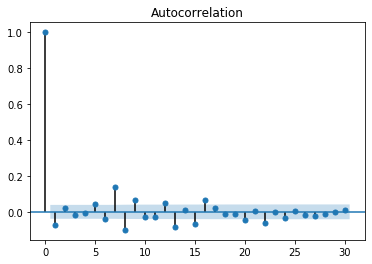

In [ ]:
sm.graphics.tsa.plot_acf(diff_blk_close,lags=30)
plt.show()

ACF plot for `BlackRock` stock price indicates a pattern typical for situations where an MA(8) model may be useful. There are three statistically significant “spikes” at lags 1,7 and 8 followed by non-significant values for other lags.

In [ ]:
moving_average_blk=diff_blk_close.rolling(window=8).mean()

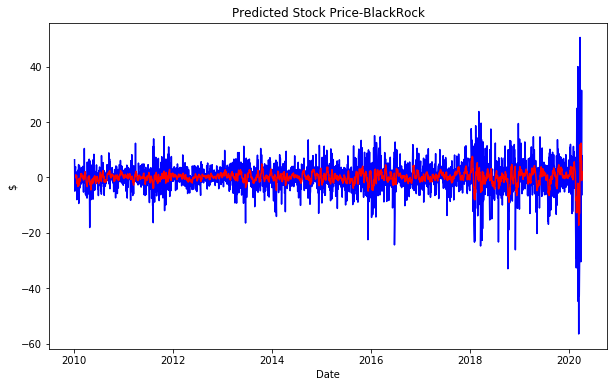

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close.loc[start:end].index, diff_blk_close.loc[start:end], label='Stock Price',c='b')
plt.plot(moving_average_blk.loc[start:end].index, moving_average_blk.loc[start:end], label = 'MA',c='r')
plt.title('Predicted Stock Price-BlackRock')
plt.xlabel('Date')
plt.ylabel(ylabel='$')
plt.show()

###  Autoregressive Model

`Autoregressive model` (AR) is one of the most basic models in time series. As its name suggest, we regress the current value of a series over its lagged values. So, it is based on the idea that current values of series $x_t$ can be accounted for as a function of past values.

Different lag values can be employed to explain the current value of $x_t$. Symbolically, AR(p) denotes that $x_t$ is explained by p past values of $x_t$.

For the sake of simplicity, AR(1) model can be represented by the following equation:

$$ X_{t} = \alpha + \beta X_{t-1} + \epsilon $$

In order to model AR in python, we use `AutoReg` library. But the question is can we define the optimal lag number? To do that we have two different ways to follow:

* Partial Autocorrelation Function
* Akaike Information Criteria

Partial Autocorrelation Function (PACF) is another method to examine the relationship between ${X_t}$ and ${X_{t-p}}, p\in \mathbb{Z}$. ACF is considered as a useful tool in MA(q) model sumply beacuse it lets us define the cut-off point for optimal lag. ACF is, however, not working well with AR(p) process.

PACF provides information on correlation between current value of a time series and its lagged values controlling for the other correlations. 

Let us identify the best-fitting AR model with AIC using `PACF`.

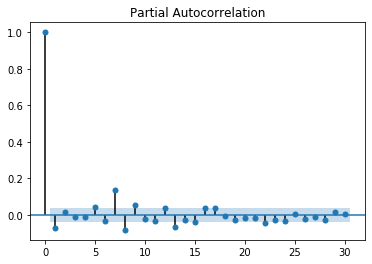

In [ ]:
sm.graphics.tsa.plot_pacf(diff_blk_close,lags=30)
plt.show()

The PACF shows some spikes at lag 1 and 6, which can be interpreted to mean that a six-order autoregression may be warranted since there are notable partial autocorrelations for lags 1 and six. 

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
ar_blk = AutoReg(diff_blk_close,lags=8)
ar_fitted_blk = ar_blk.fit()
ar_predictions_blk= ar_fitted_blk.predict(start=len(diff_blk_close[:-50]), 
                                   end=len(diff_blk_close[:-50])+len(diff_blk_close[-50:])-1,dynamic=False)

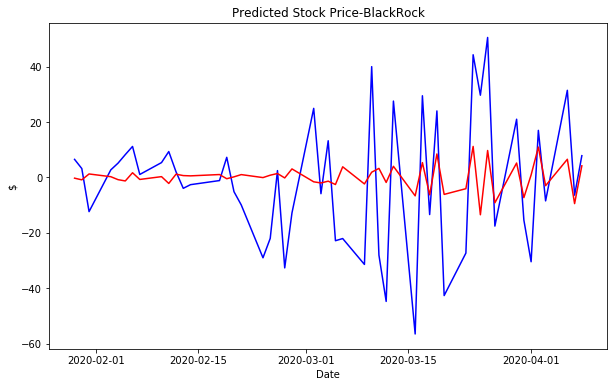

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close[-50:], label='Actual Stock Price',c='b')
plt.plot(ar_predictions_blk,c='r')
plt.title('Predicted Stock Price-BlackRock')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

The above-given plot shows how AR predicts. The blue line indicates the closing price of Apple and the red line represents the prediction based on AR and it turns out the prediction performance is not that good.

### Autoregressive Integrated Moving Average

As we discuss the stationary assumption should be satisfied in modeling a time series. In the presence of non-stationarity, first difference needs to be taken before running AR, MA, and ARMA. However, it is not the case for `Autoregressive Integrated Moving Average`(ARIMA) in that we have `Integrated` term. So, before running ARIMA, all we need to do specify the degree of difference along with two other parameters borrowed from ARMA(p,q). In a nutshell, ARIMA(p,d,q) has three parameters and one of is for making a series stationary.

The first and third parameters of ARIMA is coming from AR and MA components, respectively and as we can guess the second parameter represents the order of difference.

To use ARIMA, we again use `statsmodels` but now import `ARIMA` library:

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
arima_blk = ARIMA(blk_close,order=(4,1,4))
arima_fitted_blk = arima_blk.fit()

In [ ]:
arima_predictions_blk= arima_fitted_blk.predict(start=len(blk_close[:-50]), 
                                   end=len(blk_close[:-50])+len(blk_close[-50:])-1,dynamic=False)
arima_predictions_blk=pd.DataFrame(arima_predictions_blk)
arima_predictions_blk.index=blk_close[-50:].index

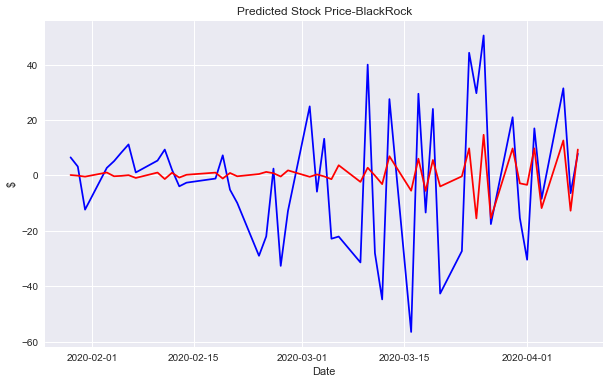

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(diff_blk_close[-50:], label='Actual Stock Price',c='b')
plt.plot(arima_predictions_blk,c='r')
plt.title('Predicted Stock Price-BlackRock')
plt.xlabel('Date')
plt.ylabel('$')
plt.show()

## Volatility Modeling and Its Application with Python


Uncertainty comes in the form of volatility, which, in turn, amounts to information. To this end, determining the causes of volatility in financial markets and predicting these movements beforehand have become an indispensable condition of financial success in these markets.

Besides, volatility and risk go in tandem in financial markets. Increasing risk emanating from volatility poses a huge thread on the investment decisions. So, it is not adequate to know current volatility in the market, investors should have knowledge about the likely future path of volatility as well. Only after that, investor can properly gauge the market dynamics and risk level, which enables her to invest in a well-founded way.

In this lesson, we will study some well-known volatility models:
* `ARCH` and
* `GARCH`

Then, we will conduct prediction analyses based on them.

### Volatility Prediction based on ARCH model 

In order to take into account all these deviations, i.e. leptokurtosis, volatility clustering, and leverage, `ARCH` (Autoregressive Conditional Heteroscedasticity) models, by Engle (1982) and Bollerslev (1986), has been proposed. Mathematically speaking, 

$$
\sigma^2_t=\alpha_0+\alpha_1u^2_{t-1}+\alpha_2u^2_{t-2}+\cdots...+\alpha_qu^2_{t-q}=\alpha_0+\sum_i^q\alpha_iu^2_{t-i}
$$

where $\alpha_0>0, \alpha_i>0, \text{ and } u_t=\sigma_tz_t$

The steps we need to estimate the ARCH model are:
* Fitting autoregressive model to obtain $u_i$. $r_t=\alpha_0+\alpha_1r_{t-1}+\cdots...+\alpha_pr_{t-q}+u_t$
* After having $u^2$, regress them on a constant $\alpha$ and q lagged values of error terms

Let's model the volatility using ARCH model in python. We will employ arbitrarily selected four different stocks:
* Ford Motor Company
* BlackRock Inc.
* Amazon.com Inc.
* Alphabet Inc. Class C (the company formerly known as Google)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import yfinance as yf
from sklearn.metrics import mean_squared_error

Using yahoo finance we retrieve daily stock prices of our four stock for the period of `01-01-2010` and `01-04-2020`:

In [ ]:
stocks = ['F','BLK','GOOG','AMZN']
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,4,1)
stock_prices = yf.download(stocks,start=start,end = end, interval='1d')['Adj Close']

[*********************100%***********************]  4 of 4 downloaded


In [ ]:
stock_prices.head()

,AMZN,BLK,F,GOOG
Date,,,,
2009-12-31,134.52,172.71,6.78,308.83
2010-01-04,133.90,177.46,6.97,312.20
2010-01-05,134.69,178.22,7.43,310.83
2010-01-06,132.25,174.55,7.71,302.99
2010-01-07,130.00,176.47,7.90,295.94


As we may notice, it is not stock price but return that we used as variable in modeling volatility and , by convention, log return is embraced in the literature. As a final step, we scale returns up by 100 to get rid of convergence issues:

In [ ]:
returns_all=[]
for i in stock_prices.columns:
    log_returns=np.log(stock_prices[str(i)]/stock_prices[str(i)].shift(1))
    returns_all.append(100*log_returns)

Here, we turn list object into dataframe and transpose it to properly align rows and columns:

In [ ]:
returns_all=pd.DataFrame(returns_all)
returns_all=returns_all.T
returns_all=pd.DataFrame(returns_all,columns=stock_prices.columns)
returns_all.head()

As a final step of the data preparation, first we drop the `NaN` values that we see at the first row of the `returns_all` data. Then, we obtain summary statistic providing the very first assessment about the data:

In [ ]:
from arch import arch_model
results_arch=[]
for i in returns_all.columns:
    results_arch.
    append(arch_model((returns_all[i]),
                      mean='Constant',vol='arch',
                      dist='Normal').fit(disp='off'))

The result of the ARCH model is given below, `omega` and `alpha` are constant term and slope coefficient, respectively. Based on this estimation, we conduct our prediction. In prediction, we employ these estimated coefficients:

In [ ]:
split_date='2019-02-01'
forecast_arch=[]
for i in range(len(returns_all.columns)):
    forecast_arch.append(results_arch[i].
                         forecast(start=split_date).
                         variance[split_date:].mean(axis=1))

To compare how good our prediction is we need a benchmark variable, which is `realized variance` in this case. It is know as `rolling` method and the number of subsequent returns are labeled as `window size`.

In [ ]:
window_size=5
rv_all=[]
for j in returns_all.columns:
    rv=(returns_all[j]).rolling(window_size).std()
    rv_all.append(rv)
rv_all=pd.DataFrame(rv_all).T
rv_all.dropna(inplace=True)

As we start our prediction from split date, which is `2019-02-01`, the orange line representing ARCH prediction starts as of this split date and make prediction all the way to the last date of our dataset. The result does look good, doesn't it? 

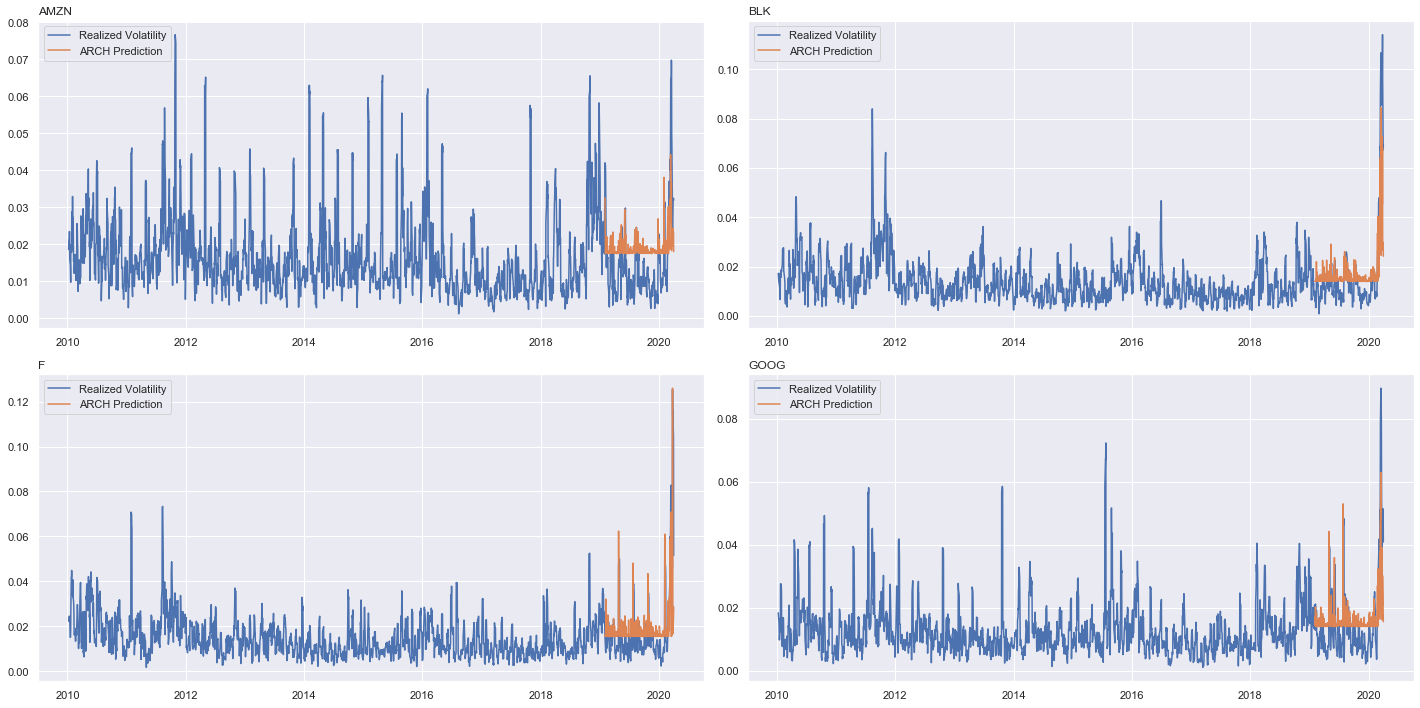

In [ ]:
sns.set()
plt.figure(figsize=(20,10))
k=0
for i,j in zip(returns_all.columns,range(len(returns_all.columns))):
    k+=1
    plt.subplot(2,2, k)
    plt.tight_layout()
    plt.plot(rv_all[i]/100,label='Realized Volatility')
    plt.plot(np.sqrt(forecast_arch.iloc[:,j])/100,
             label='ARCH Prediction')
    plt.title(i, loc='left', fontsize=12)
    plt.legend(loc='best')

In [ ]:
rmse_all_arch_std=[]
for i in rv_all.columns:
    rmse = np.sqrt(mean_squared_error(rv_all[i][-253:]/100, np.sqrt(forecast_arch.iloc[-253:].mean(axis=1))/100))
    rmse_all_arch_std.append(rmse)
print(rmse_all_arch_std)
print('---'*30)
print(np.mean(rmse_all_arch_std))

[0.009346291008772113, 0.01559173961579478, 0.015084919865282818, 0.011916184627447306]
------------------------------------------------------------------------------------------
0.012984783779324254


### Volatility Prediction based on GARCH model 

Bollerslev (1986) and Taylor (2008) improved ARCH model by adding lagged conditional variance into the equation and it is referred to as `GARCH` (The Generalized Autoregressive Conditional Heteroscedasticity). The mathematical equation is similar to ARCH except for one term, which is past values of conditional volatility $\sigma^2$:

$$
\sigma^2_t=\omega+\beta\sigma^2_{t-1}+\alpha u^2_{t-1}
$$

where $\omega$, $\beta$, and $\alpha$ are parameters and have restrictions: $\omega$ $>$ 0, $\beta$ $\geq$ 0, and $\alpha$ $\geq$ 0. 

In [ ]:
from arch import arch_model

In [ ]:
results_garch=[]
for i in returns_all.columns:
    results_garch.append(arch_model((returns_all[i]),
                                    mean='Constant',vol='garch',
                                    dist='Normal').fit(disp='off'))

Different froam ARCH model, we have one more variable $\beta$ attached to lagged values of conditional variance. GARCH model result is exhibited below:

As of the same split date, we initiate the prediction:

In [ ]:
forecast_garch=[]
for i in range(len(returns_all.columns)):
    forecast_garch.append(results_garch[i].
                          forecast(start=split_date).
                          variance[split_date:].mean(axis=1))

The below-given plots exhibit that volatility prediction based on GARCH is more volatile than ARCH model, which is not surprising simply because GARCH model has more parameters that enable us to better capture the dynamics of data.

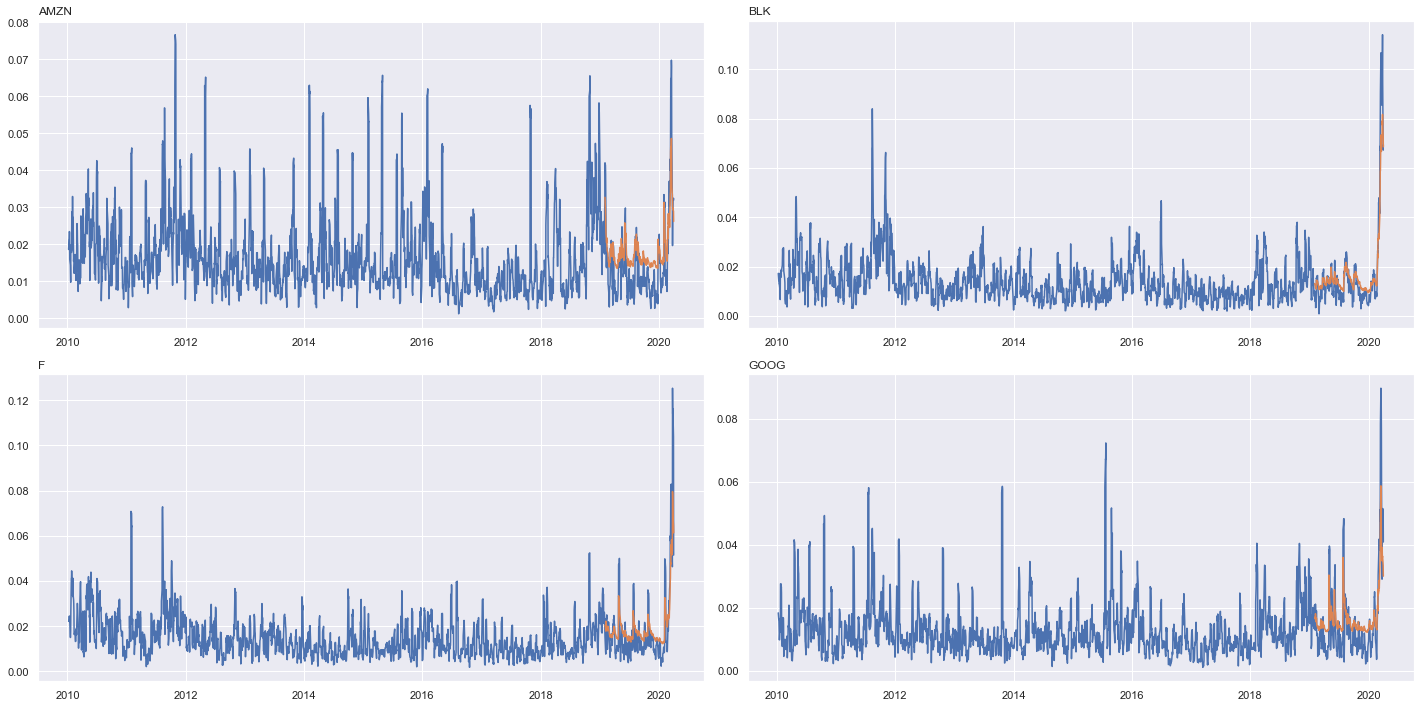

In [ ]:
sns.set()
plt.figure(figsize=(20,10))
k=0
for i,j in zip(returns_all.columns,range(len(returns_all.columns))):
    k+=1
    plt.subplot(2,2, k)
    plt.tight_layout()
    plt.plot(rv_all[i]/100)
    plt.plot(np.sqrt(forecast_garch.iloc[:,j])/100)
    plt.title(i, loc='left', fontsize=12)

In [ ]:
bic_all=[]
forecast_garch_std=[]
for i in returns_all.columns:
    for p in range(1,5):
        for q in range(1,5):
            for o in range(1,5):
                garch = arch_model((returns_all[i]),mean='Constant',vol='Garch',p=p,o=0,q=q,dist='Normal').fit(disp='off')
                bic_all.append(garch.bic)
                if garch.aic==np.min(bic_all):
                    best_param=p,q
    garch = arch_model((returns_all[i]),mean='Constant',vol='Garch',p=p,o=0,q=q,dist='Normal').fit(disp='off')
    forecast=garch.forecast(start=split_date)
    forecast_garch_std.append(forecast)
    forecast_garch_table = pd.DataFrame(forecast_garch_std)

In [ ]:
rmse_all_garch_std=[]
for i,j in zip(rv_all.columns,range(0,len(forecast_garch_table))):
    rmse = np.sqrt(mean_squared_error(rv_all[i][-253:]/100, np.sqrt(forecast_garch_std[j].variance[-253:].mean(axis=1))/100))
    rmse_all_garch_std.append(rmse)
print(rmse_all_garch_std)
print('---'*30)
print(np.mean(rmse_all_garch_std))

[0.006554707870987988, 0.007524348529179314, 0.010368273851343273, 0.008479750900249107]
------------------------------------------------------------------------------------------
0.00823177028793992


## Principal Component Analysis (PCA) for liquidity proxy

`Bid-ask` spread measures are commonly used for modelling liqudiity. Shortly, bid-ask spread is the difference of bid-ask spread. Put differently, it is the difference between the highest available price (bid price) that a buyer is willing to pay and the lowest price (ask price) that a seller is willing to get. So, bid-ask spread gives a tool to measure the transaction cost.

$
\text{Effective Spread}=2*|(P_t-P_{mid})|
$

$
\text{Proportional Quoted Spread}=(P_{ask}-P_{bid})/P_{mid}
$

$
\text{Quoted Spread}= P_{ask}-P_{bid}
$

$
\text{Proportional Effective Spread}= 2*(|P_t-P_{mid}|)/P_{mid}
$

$\text{Effective Cost}= \left  \{
  \begin{array}{lr}
  (P_t-P_{mid})/P_{mid}\text{ for buyer initiated}\\
  (P_{mid}/P_t)/P_{mid}\text{ for seller initiated}\\
   \end{array}
\right.
$

`Cross-sectional mean` is nothing but averaging the bid-ask spread. Using this method, we are able to generate a measure for market-wide liquidity. The averaging formula is as follows:

$
L_{M,t}=\frac{1}{N}\sum^N_i L_{i,t}
$

PCA is the other method to unveil the hidden characteristics of the data

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
bid_ask['mid_price']=(bid_ask['ASKHI']+bid_ask['BIDLO'])/2
buyer_seller_initiated=[]
for i in range(len(bid_ask)):
    if bid_ask['PRC'][i]>bid_ask['mid_price'][i]:
        buyer_seller_initiated.append(1)
    else:
        buyer_seller_initiated.append(0)
        
bid_ask['buyer_seller_init']=buyer_seller_initiated   

In [ ]:
effective_cost=[]
for i in range(len(bid_ask)):
    if bid_ask['buyer_seller_init'][i]==1:
        effective_cost.append((bid_ask['PRC'][i]-bid_ask['mid_price'][i])/bid_ask['mid_price'][i])
    else:
        effective_cost.append((bid_ask['mid_price'][i]-bid_ask['PRC'][i])/bid_ask['mid_price'][i])
bid_ask['effective_cost']=effective_cost

In [ ]:
bid_ask['quoted']=bid_ask['ASKHI']-bid_ask['BIDLO']
bid_ask['prop_quoted']=(bid_ask['ASKHI']-bid_ask['BIDLO'])/bid_ask['mid_price']
bid_ask['effective']=2*abs(bid_ask['PRC']-bid_ask['mid_price'])
bid_ask['prop_effective']=2*abs(bid_ask['PRC']-bid_ask['mid_price'])/bid_ask['PRC']

In [ ]:
spread_measures=bid_ask.iloc[:,-5:]

In [ ]:
scaler=StandardScaler()
spread_measures_scaled=scaler.fit_transform(np.abs(spread_measures))
pca = PCA(n_components=5)
prin_comp=pca.fit_transform(spread_measures_scaled)

In [ ]:
var_expl=np.round(pca.explained_variance_ratio_,decimals=4)
cum_var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4))
print('Individually Explained Variances are:\n{}'.format(var_expl)) 
print('=='*30)
print('Cumulative Explained Variances are: {}'.format(cum_var))  

Individually Explained Variances are:
[0.7494 0.1461 0.0983 0.0062 0.    ]
Cumulative Explained Variances are: [0.7494 0.8955 0.9938 1.     1.    ]


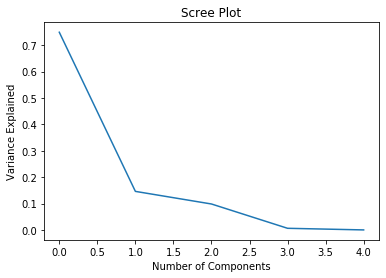

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.savefig('Scree_plot.png')
plt.show()

In [ ]:
pca = PCA(n_components=2)
pca.fit(np.abs(spread_measures_scaled))
prin_comp=pca.transform(np.abs(spread_measures_scaled))
prin_comp= pd.DataFrame(np.abs(prin_comp), columns = ['Component 1', 'Component 2'])
print(pca.explained_variance_ratio_*100)  

[65.65640435 19.29704671]


In [ ]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex*4,ys * scaley*4,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0], coeff[i,1] , "Var"+str(i), color = 'black')
        else:
            plt.text(coeff[i,0], coeff[i,1] , labels[i], color = 'black')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [ ]:
spread_measures_scaled_df=pd.DataFrame(spread_measures_scaled,columns=spread_measures.columns)

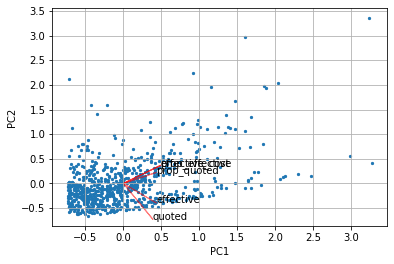

In [ ]:
myplot(np.array(spread_measures_scaled_df)[:,0:2],np.transpose(pca.components_[0:2,:]),list(spread_measures_scaled_df.columns))# <8>
plt.savefig('Bi_plot.png')
plt.show()

In [ ]:
prin_comp1_rescaled=prin_comp.iloc[:,0]*prin_comp.iloc[:,0].std()+prin_comp.iloc[:,0].mean()
prin_comp2_rescaled=prin_comp.iloc[:,1]*prin_comp.iloc[:,1].std()+prin_comp.iloc[:,1].mean()
prin_comp_rescaled=pd.concat([prin_comp1_rescaled,prin_comp2_rescaled],axis=1)
prin_comp_rescaled.head()

,Component 1,Component 2
0,1.766661,1.256192
1,4.835170,1.939466
2,3.611486,1.551059
3,0.962666,0.601529
4,0.831065,0.734612


In [ ]:
mean_pca_liq=prin_comp_rescaled.mean(axis=1)
mean_pca_liq.head()

0    1.511427
1    3.387318
2    2.581272
3    0.782098
4    0.782838
dtype: float64

## Suggested Readings

* Python for Finance by Yves Hilpsich
* AI for Finance by Yves Hilpsich
* Machine Learning for Asset Managers by Marcos M. López de Prado 
* Advances in Financial Machine Learning by Marcos M. López de Prado 
* Machine Learning in Finance: From Theory to Practice by Dixon et al.